In [ ]:
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


main_folder = '/content/drive/MyDrive/Waste_segregation/garbage_classification'


train_ratio = 0.8

train_dir = '/content/drive/MyDrive/Waste_train'
test_dir = '/content/drive/MyDrive/Waste_test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for class_folder in os.listdir(main_folder):
    class_path = os.path.join(main_folder, class_folder)
    if os.path.isdir(class_path):
        images = [image for image in os.listdir(class_path) if image.endswith('.jpg')]

        random.shuffle(images)

        split_index = int(len(images) * train_ratio)

        train_images = images[:split_index]
        test_images = images[split_index:]

        # Copy images to train directory
        for image in train_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(train_dir, class_folder, image)
            os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)
            shutil.copy(src, dst)

        # Copy images to test directory
        for image in test_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(test_dir, class_folder, image)
            os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)
            shutil.copy(src, dst)

print("Dataset splitting completed successfully.")




Dataset splitting completed successfully.


Found 12409 images belonging to 12 classes.
12409
Found 3106 images belonging to 12 classes.
Epoch 1/10
387/387 [==============================] - 75s 178ms/step - loss: 1.3666 - accuracy: 0.5468 - val_loss: 1.0843 - val_accuracy: 0.6527
Epoch 2/10
387/387 [==============================] - 66s 170ms/step - loss: 0.8686 - accuracy: 0.7104 - val_loss: 0.8883 - val_accuracy: 0.7268
Epoch 3/10
387/387 [==============================] - 66s 171ms/step - loss: 0.6502 - accuracy: 0.7893 - val_loss: 0.9249 - val_accuracy: 0.7062
Epoch 4/10
387/387 [==============================] - 73s 189ms/step - loss: 0.4441 - accuracy: 0.8532 - val_loss: 0.8958 - val_accuracy: 0.7564
Epoch 5/10
387/387 [==============================] - 65s 168ms/step - loss: 0.2586 - accuracy: 0.9149 - val_loss: 0.9524 - val_accuracy: 0.7477
Epoch 6/10
387/387 [==============================] - 65s 167ms/step - loss: 0.1809 - accuracy: 0.9421 - val_loss: 1.1905 - val_accuracy: 0.7452
Epoch 7/10
387/387 [=================

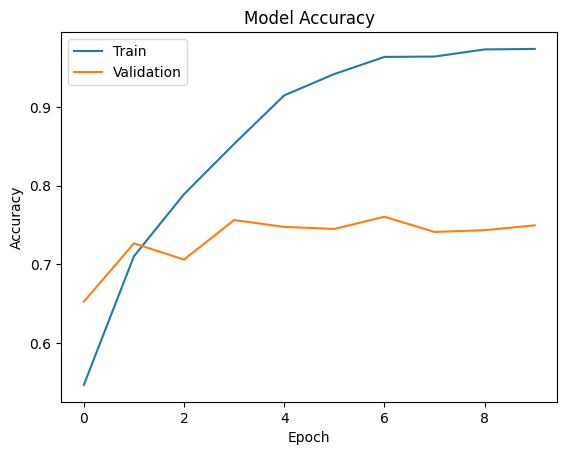

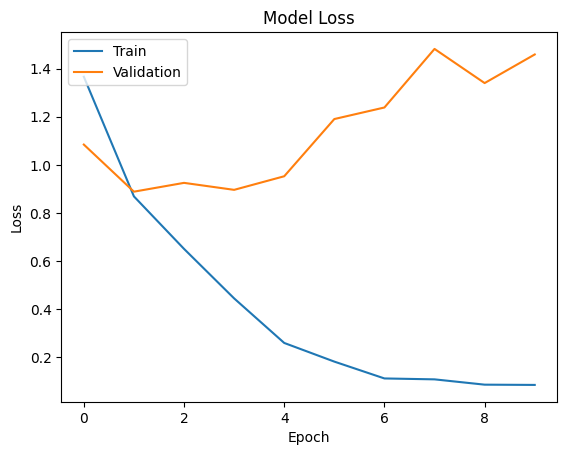

98/98 [==============================] - 13s 127ms/step


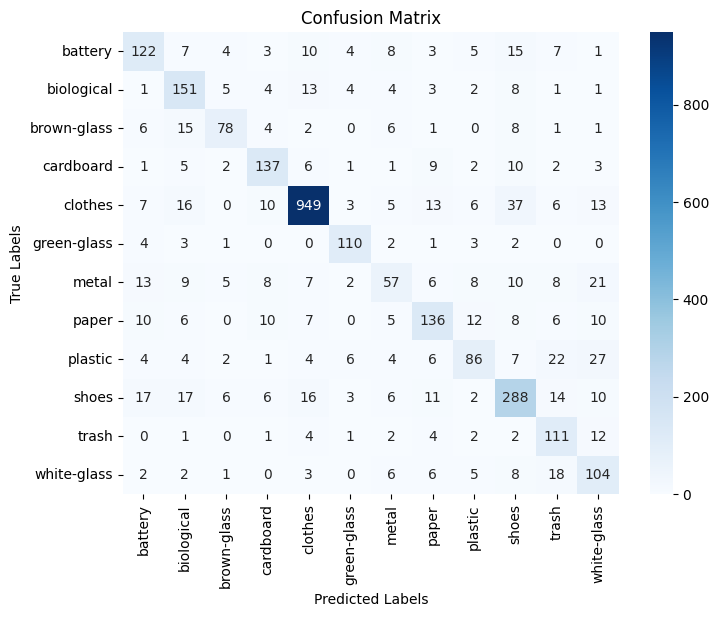

In [ ]:
batch_size = 32
image_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
print(train_generator.samples)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix
test_steps = len(test_generator)
predictions = model.predict(test_generator, steps=test_steps)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

class_names = list(train_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
model.save('waste_segregation_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model("waste_segregation_model.h5")

# Get the file path from the user
file_path = input("Enter the file path of the image you want to classify: ")

# Load and preprocess the image
img = image.load_img(file_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
print("Predictions:", predictions)
index=np.argmax(predictions)
classes=["battery","biological","brown-glass","cardboard","clothes","green-glass","metal","paper","plastic","shoes","trash","white-glass"]
print(f"the predicted image is {classes[index]}")

Enter the file path of the image you want to classify: /content/drive/MyDrive/Waste_segregation/garbage_classification/battery/battery1.jpg


1/1 [==============================] - 0s 184ms/step
Predictions: [[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 6.8077425e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
the predicted image is battery
